     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0               

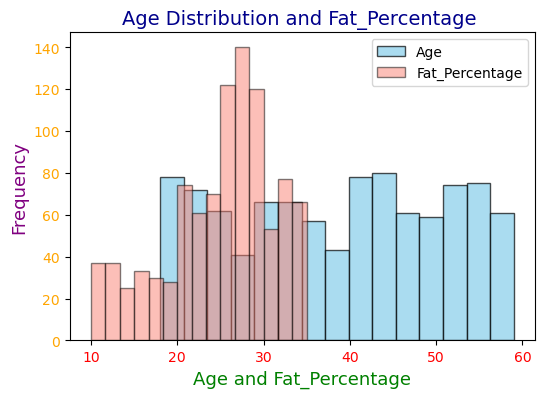

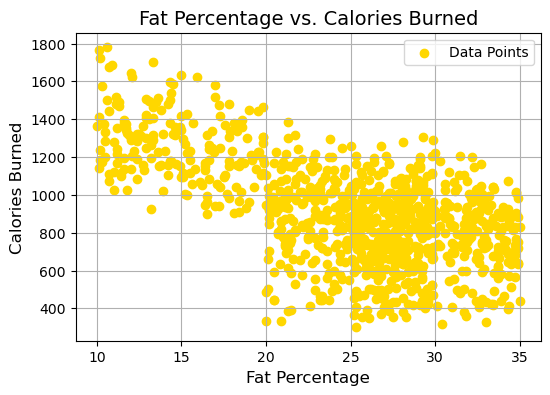

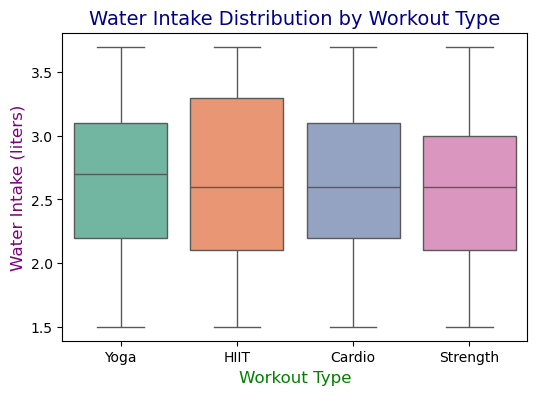

describe               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration  Calories_Burned  Fat_Percentage  \
count   973.000000        973.000000       973.000000      973.000000   
mean     62.223022          1.256423       905.422405       24.976773   
std       7.327060          0.343033       272.641516        6.259419   
min      50.000000          0.500000       303.000000       10.00000

In [91]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Ignoring warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Histogram for Age Distribution
def plot_histogram(df):
    """
    Plot a histogram to visualize the distribution of the 'Age' column in the DataFrame, with colored axes.
    
    Parameters:
    df (DataFrame): The DataFrame containing the 'Age' column to be plotted.
    """
    plt.figure(figsize=(6, 4))
    plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7, label='Age')
    plt.hist(df['Fat_Percentage'], bins=15, color='salmon', edgecolor='black', alpha=0.5, label='Fat_Percentage')
    plt.title('Age Distribution and Fat_Percentage ', color='darkblue', fontsize=14)
    plt.xlabel('Age and Fat_Percentage', color='green', fontsize=13)
    plt.legend(loc='upper right')
    plt.ylabel('Frequency', color='purple', fontsize=13)
    plt.xticks(color='red')
    plt.yticks(color='orange')
    plt.show()


# Scatter Plot for Fat_Percentage and Calories_Burned
def plot_scatter(df):
    """
    Plot a scatter plot to visualize the relationship between 'Fat_Percentage' and 'Calories_Burned'.
    
    Parameters:
    df (DataFrame): The DataFrame containing the 'Fat_Percentage' and 'Calories_Burned' columns.
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(df['Fat_Percentage'], df['Calories_Burned'], color='gold', label='Data Points')
    plt.xlabel('Fat Percentage', fontsize=12)
    plt.ylabel('Calories Burned', fontsize=12)
    plt.title('Fat Percentage vs. Calories Burned', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()


# Box Plot for Workout_Type and Water_Intake
def workout_type_and_water(df, colorx, colory):
    """
    Plot a boxplot to visualize the distribution of water intake (in liters) by workout type.
    
    Parameters:
    df (DataFrame): The DataFrame containing 'Workout_Type' and 'Water_Intake' columns.
    colorx (str): Color for the x-axis label.
    colory (str): Color for the y-axis label.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Workout_Type', y='Water_Intake', data=df, palette="Set2")
    plt.title('Water Intake Distribution by Workout Type', fontsize=14, color='darkblue')
    plt.xlabel('Workout Type', fontsize=12, color=colorx)
    plt.ylabel('Water Intake (liters)', fontsize=12, color=colory)
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.show()


# Calculate describe, coorelation, mean, standard deviation, kurtosis, skewness, and median
def calculate_all_stats(df):
    """
    Calculate and print the describe, coorelation, mean, median, standard deviation, skewness, and kurtosis for numeric columns in the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing numerical columns.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    # Summary describe for numeric columns
    print("describe",numeric_df.describe())
    # Correlation matrix for numeric columns
    print("Correlation",numeric_df.corr())
    moments = df.select_dtypes(include=[np.number]).agg(['mean', 'median', 'std', 'skew', 'kurtosis'])
    
    print("\nMoments (Mean, Median, Std, Skewness, Kurtosis):")
    print(moments)


# Data loading and preprocessing
df = pd.read_csv('gymdataset.csv')
print(df.dropna())
df = df.drop_duplicates()
print(df.head())

#calling
plot_histogram(df)
plot_scatter(df)
workout_type_and_water(df, 'green', 'purple')
calculate_all_stats(df)